In [29]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import joblib
from skimage.transform import resize

In [2]:
def image_loader(dimension,categories,Is_tumor=False):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    image_dir = 'C:/Users/13862/Desktop/AMLS_assignment/dataset/image/' 
    if Is_tumor:
        class_dic = {'meningioma_tumor':0,'glioma_tumor':0, 'pituitary_tumor':0, 'no_tumor':1}
    else:
        class_dic = {'meningioma_tumor':0,'glioma_tumor':1, 'pituitary_tumor':2, 'no_tumor':3}
        


    pathidentity='C:/Users/13862/Desktop/AMLS_assignment/dataset/'+'label.csv'
    data = pd.read_csv(pathidentity)
    images = []
    flat_data = []
    target = []
    for idx in range(len(data)):
        file=image_dir + data.iloc[idx,0]
        img = imread(file)
        img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
        flat_data.append(img_resized.flatten()) 
        images.append(img_resized)       
        labels = data.iloc[idx, 1]
        target.append(categories[class_dic[str(labels)]])      
        
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories)

In [3]:
Tumnor_detection=True
thesize=64
if Tumnor_detection:
    classes = ['tumor', 'no_tumor']
    num_classes=2
else:  
    # 0 for meningioma, 1 for glioma, 2 for pituitary tumor
    classes = ['meningioma_tumor','glioma_tumor', 'pituitary_tumor', 'no_tumor']
    num_classes=4
image_dataset = image_loader((thesize,thesize),categories=classes,Is_tumor=Tumnor_detection)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

In [41]:
# param_grid = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
#  ]
# Kernel = ["linear",'poly',"rbf","sigmoid"]
param_grid = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['sigmoid']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)
joblib.dump(clf, 'SVM_tumordection.pkl') 

['SVM_tumordection.pkl']

In [31]:
clf = joblib.load('SVM_tumordection.pkl') 

In [42]:
y_pred = clf.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['sigmoid']}]):
              precision    recall  f1-score   support

    no_tumor       0.70      0.70      0.70       143
       tumor       0.94      0.94      0.94       757

    accuracy                           0.91       900
   macro avg       0.82      0.82      0.82       900
weighted avg       0.91      0.91      0.91       900




In [43]:
y_pred=clf.predict(X_test)
# print("The predicted Data is :")
# print(y_pred)
# print("The actual data is:")
# print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 90.55555555555556% accurate


In [29]:
# for idx in range(len(X_test)):    

print(len(X_test))


900


<IPython.core.display.Javascript object>


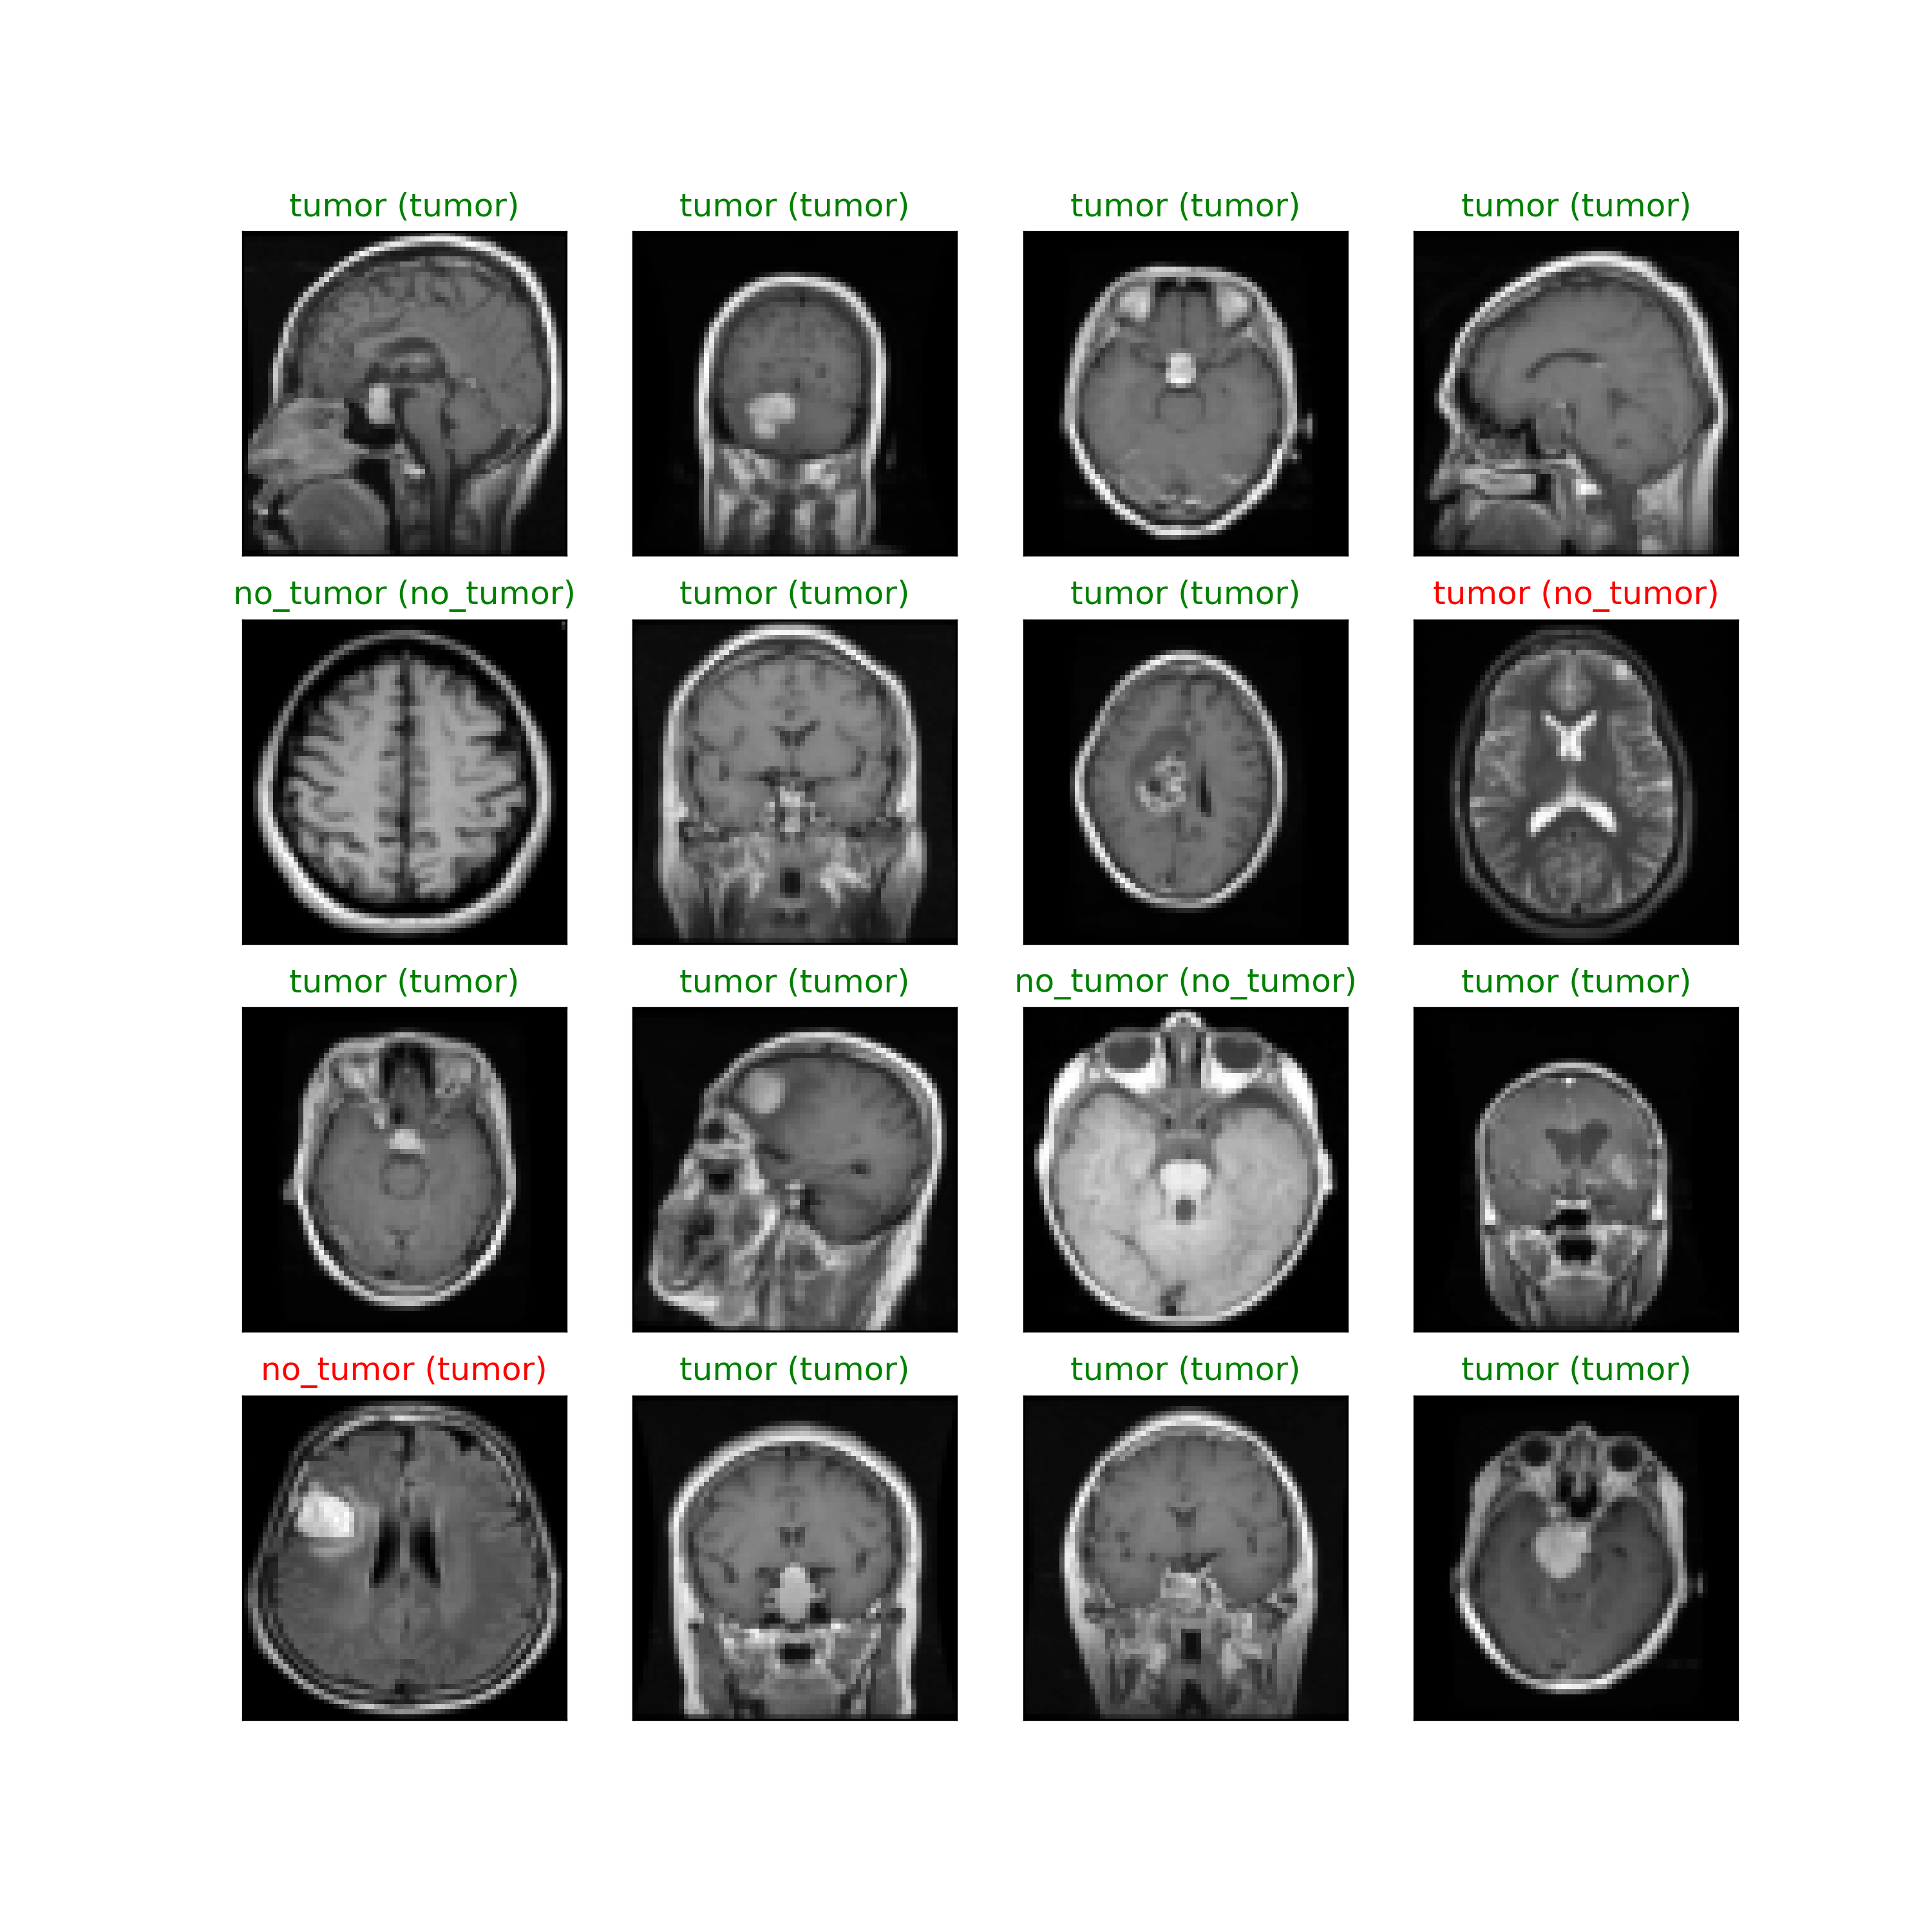

In [26]:
batch_size=16
output = clf.predict(X_test[:batch_size])
labels = y_test[:batch_size]

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(10,10))
# display 20 images
row_size=4
for idx in range(batch_size):
    ax = fig.add_subplot(row_size, batch_size/row_size, idx+1, xticks=[], yticks=[])
    img_resize=[]
    theimg=X_test[idx]
    for i in range(len(theimg)):
        if i%3==0:
            img_resize.append(theimg[i])
    theimg=img_resize.copy()
    img_resize=[]
    for i in range(thesize):
        img_resize.append(theimg[i*thesize:(i+1)*thesize])
    img_resize=np.array(img_resize)
    plt.imshow(img_resize, cmap=plt.get_cmap('gray'))
    ax.set_title("{} ({})".format(output[idx], labels[idx]),
                 color=("green" if output[idx]==labels[idx] else "red"))